# opencv 이미지 변형

In [21]:
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np

## 보간법 (이미지 크기 변형)
보간법으로 이미지 변형을 한다. 보간법은 사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법을 의미한다.
보간법의 종류는 
- 1D nearest-neighbour
- Linear
- Cubic
- 2D nearest-neighbour
- Bilinear
- Bicubic

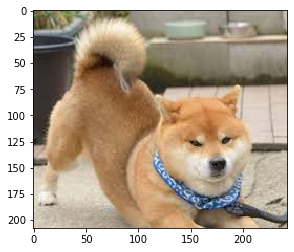

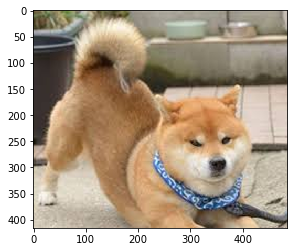

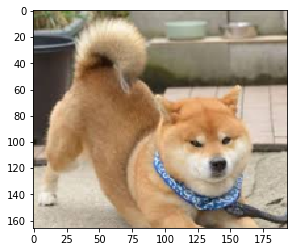

In [19]:
image_path = 'C:/Users/sungyun/Desktop/etc/img/sibadog.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
image_cubic = cv2.resize(image, None, fx = 2.0, fy = 2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(image_inter, cv2.COLOR_BGR2RGB))
plt.show()
image_area = cv2.resize(image, None, fx = 0.8, fy = 0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(image_area, cv2.COLOR_BGR2RGB))
plt.show()

# cv2.resize 는 이미지의 크기를 비율로 조절이 가능하다.
# interpolation으로 보간법을 정해준다.
# INTER_CUBIC : 사이즈를 크게 할 때 주로 사용
# INTER_AREA : 사이즈를 작게 할 때 주로 사용

위에서는 크기의 변화를 눈금으로만 확인 할 수 있지만 pycharm이나 다른 jupyter가 아닌 환경에서는 변화되어 보임

## 이미지의 위치 변경
- cv2.warpAffine(image, M, dsize) : 이미지의 위치를 변경
1. M : 변환 행렬을 의미
2. dsize: Manual Size

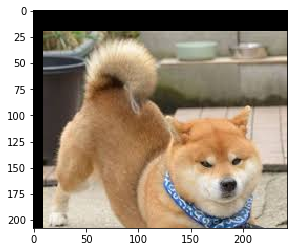

In [44]:
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# 행과 열의 값을 가져온다.
height , width = image.shape[:2]

M = np.float32([[1,0,10],[0,1,20]])  # 변환 행열을 정의한다. 이미지의 모든 픽셀의 좌표를 이동한다 보면 되겠다.
# (10 + tx, 20 + ty) 이라보면 되겠다.
dst = cv2.warpAffine(image, M, (width,height)) # 변환 행열의 값을 각각 픽셀값에 대입해 이동시켜주는 거라 생각하면 되겠다.

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 회전 방법
- cv2.getRotationMatrix2D(center, angle, scale)
1. center : 이미지 위치를 설정
2. angle : 각도 설정
3. scale : 크기 비율을 설정

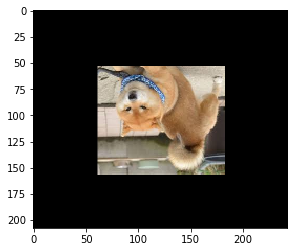

In [52]:
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# 행과 열의 값
height , width = image.shape[:2]

M = cv2.getRotationMatrix2D((width / 2 , height /2), 180, 0.5) # cos, sin 을 이용해 회전을 시킨다.
# 각도를 90, 스케일 값을 0.5로 width/2, height/2 로 중앙에 설정을 한다
# param 순은 center , angle, scale 순
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dat, cv2.COLOR_BGR2RGB))
plt.show()

# opencv 이미지 합치기
- cv2.add() : Saturation 연상을 수행,
0 보다 작으면 0, 255보다 크면 255로 표현
- np.add(): Modulo 연산을 수행,
256은 0, 257은 1로 표현